In [220]:
import pandas as pd
import numpy as np
import tweepy
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [221]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SohailShaikh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SohailShaikh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SohailShaikh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## __1 - Business Problem__  
___1) Extract tweets for any user (try choosing a user who has more tweets)___  
___2) Perform sentimental analysis on the tweets extracted from the above___  

## __2 - Data collection and description__ 

#### __2.1 Connecting to Twitter and downloading the tweets__ 

In [26]:
consumer_key = ""
consumer_secret = ""
access_key = ""
access_secret = ""

In [27]:
alltweets = []

In [28]:
def get_all_tweets(screen_name):
    auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    alltweets.extend(new_tweets)
    
    oldest = alltweets[-1].id - 1
    while len(new_tweets)>0:
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        #save most recent tweets
        alltweets.extend(new_tweets)
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        print ("...%s tweets downloaded so far" % (len(alltweets)))                # tweet.get('user', {}).get('location', {})
 
    outtweets = [[tweet.created_at,tweet.entities["hashtags"],tweet.entities["user_mentions"],tweet.favorite_count,
                  tweet.geo,tweet.id_str,tweet.lang,tweet.place,tweet.retweet_count,tweet.retweeted,tweet.source,tweet.text,
                  tweet._json["user"]["location"],tweet._json["user"]["name"],tweet._json["user"]["time_zone"],
                  tweet._json["user"]["utc_offset"]] for tweet in alltweets]
    

    tweets_df = pd.DataFrame(columns = ["time","hashtags","user_mentions","favorite_count",
                                    "geo","id_str","lang","place","retweet_count","retweeted","source",
                                    "text","location","name","time_zone","utc_offset"])
    tweets_df["time"]  = pd.Series([str(i[0]) for i in outtweets])
    tweets_df["hashtags"] = pd.Series([str(i[1]) for i in outtweets])
    tweets_df["user_mentions"] = pd.Series([str(i[2]) for i in outtweets])
    tweets_df["favorite_count"] = pd.Series([str(i[3]) for i in outtweets])
    tweets_df["geo"] = pd.Series([str(i[4]) for i in outtweets])
    tweets_df["id_str"] = pd.Series([str(i[5]) for i in outtweets])
    tweets_df["lang"] = pd.Series([str(i[6]) for i in outtweets])
    tweets_df["place"] = pd.Series([str(i[7]) for i in outtweets])
    tweets_df["retweet_count"] = pd.Series([str(i[8]) for i in outtweets])
    tweets_df["retweeted"] = pd.Series([str(i[9]) for i in outtweets])
    tweets_df["source"] = pd.Series([str(i[10]) for i in outtweets])
    tweets_df["text"] = pd.Series([str(i[11]) for i in outtweets])
    tweets_df["location"] = pd.Series([str(i[12]) for i in outtweets])
    tweets_df["name"] = pd.Series([str(i[13]) for i in outtweets])
    tweets_df["time_zone"] = pd.Series([str(i[14]) for i in outtweets])
    tweets_df["utc_offset"] = pd.Series([str(i[15]) for i in outtweets])
    tweets_df.to_csv(screen_name+"_tweets.csv")
    return tweets_df

#### __2.2 Downloading the Tweets from USA President Donald Trump__ 

In [29]:
djt = get_all_tweets("realDonaldTrump")

...200 tweets downloaded so far


In [30]:
djt.head()

,time,hashtags,user_mentions,favorite_count,geo,id_str,lang,place,retweet_count,retweeted,source,text,location,name,time_zone,utc_offset
0,2020-06-20 15:40:24,[],[],23367,None,1274366497360613381,en,None,5864,False,Twitter for iPhone,....Bolton broke the law and has been called o...,"Washington, DC",Donald J. Trump,None,None
1,2020-06-20 15:40:23,[],[],27034,None,1274366494185570304,en,None,7019,False,Twitter for iPhone,"BIG COURT WIN against Bolton. Obviously, with ...","Washington, DC",Donald J. Trump,None,None
2,2020-06-20 14:46:59,[],[],28216,None,1274353054117236738,en,None,6635,False,Twitter for iPhone,.....who was all washed up until I brought him...,"Washington, DC",Donald J. Trump,None,None
3,2020-06-20 14:46:58,[],[],41583,None,1274353051252535298,en,None,9716,False,Twitter for iPhone,"Wow, I finally agree with failed political con...","Washington, DC",Donald J. Trump,None,None
4,2020-06-20 05:25:23,[],[],40436,None,1274211723839516672,und,None,11333,False,Twitter for iPhone,https://t.co/c3dhaQubWv,"Washington, DC",Donald J. Trump,None,None


#### __2.3 Cleaning the text__ 

In [209]:
txt = list(djt.iloc[:,11])

In [210]:
txt_upd = ' '.join(txt)

In [211]:
txt_upd = re.sub("[^A-Za-z" "]+"," ",txt_upd).lower() #remove special character
txt_upd = re.sub("[0-9" "]+"," ",txt_upd).lower() #remove numbers
txt_upd = re.sub(r'^https?:\/\/.*[\r\n]*', '', txt_upd).lower() #remove hyperlink

In [ ]:
wordnet = WordNetLemmatizer()

In [212]:
text_tokens = word_tokenize(txt_upd)

In [213]:
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

In [219]:
tf = TfidfVectorizer()

In [214]:
text_tf = tf.fit_transform(tokens_without_sw)

#### __2.4 Create the DF__ 

In [215]:
feature_names = tf.get_feature_names()
dense = text_tf.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=feature_names)

In [216]:
df

,abandon,abaondon,abo,abolish,accept,accepted,acces,according,accounted,achievements,...,zbkwx,zero,zl,zone,zones,zqcrvqmwhk,zukqb,zzkubjloot,zzl,zzx
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [217]:
word_list = ' '.join(df)

In [195]:
wordcloud = WordCloud(background_color='black',
                      width=1800,
                      height=1400).generate(word_list)

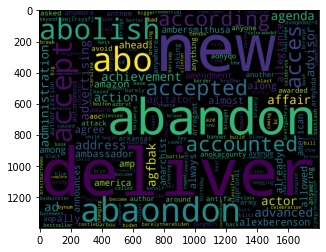

In [196]:
plt.imshow(wordcloud)

## __3 Sentimental Analysis__ 

In [109]:
with open("C:/Users/SohailShaikh/OneDrive - tiqets.com/Tiqets/Adhoc/DS/Text Mining/positive-words.txt","r") as pw:
    positive_words = pw.read().split("\n")

In [110]:
positive_words = positive_words[35:]

In [105]:
with open("C:/Users/SohailShaikh/OneDrive - tiqets.com/Tiqets/Adhoc/DS/Text Mining/negative-words.txt","r", encoding='latin-1') as nw:
    negative_words = nw.read().split("\n")

In [106]:
negative_words = negative_words[35:]

In [200]:
txt_neg_in_nw = ' '.join([word for word in df if word in negative_words])

In [201]:
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_neg_in_nw)

In [203]:
txt_pos_in_pw = ' '.join([word for word in df if word in positive_words])

In [205]:
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_pos_in_pw)

## __4 Conclusion__ 

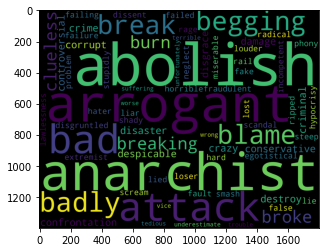

In [202]:
plt.imshow(wordcloud_neg)

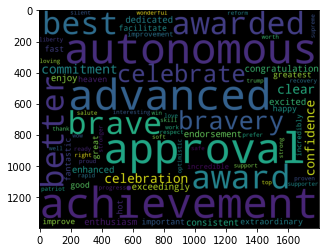

In [206]:
plt.imshow(wordcloud_pos)